In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.069440,#VALUE!,#VALUE!,0.538337,0.523856,0.552975,0.540099,0.581964,0.567813,0.599813,0.574392,0.555659,0.534345,0.439221,0.405844,0.475692,0.420076,four
1,1997-02-28 00:00:00,0.032326,#VALUE!,#VALUE!,0.645266,0.628310,0.510908,0.501898,0.563598,0.549749,0.559457,0.537504,0.545353,0.531499,0.443249,0.408951,0.467950,0.413271,four
2,1997-03-31 00:00:00,0.045495,#VALUE!,#VALUE!,0.419861,0.435726,0.500652,0.494515,0.538145,0.529193,0.536575,0.515894,0.527484,0.514412,0.446856,0.405322,0.441483,0.382216,four
3,1997-04-30 00:00:00,0.057468,#VALUE!,#VALUE!,0.454503,0.442154,0.556336,0.530701,0.565062,0.551020,0.547063,0.521778,0.550781,0.532880,0.462201,0.419587,0.406354,0.347965,four
4,1997-05-31 00:00:00,0.026339,#VALUE!,#VALUE!,0.624827,0.612519,0.566418,0.540580,0.536349,0.524214,0.552625,0.535758,0.554074,0.535458,0.487060,0.447773,0.412596,0.354794,four


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               235 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 85th percentile (top 15%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 85th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.85) # every data point over the 85th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6271176297000001


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.736606,0.510875,0.502483,0.521582,0.526253,0.500669,0.502038,0.502134,0.508854,0.594967,0.595538,0.629589,0.633944
std,0.100483,0.343910,0.327027,0.318240,0.325133,0.344400,0.335793,0.309195,0.300023,0.271799,0.269026,0.142252,0.141966
min,0.627357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.305142,0.297485
25%,0.666268,0.266731,0.293080,0.278671,0.263691,0.231095,0.236869,0.213475,0.238230,0.425262,0.445815,0.506290,0.518933
50%,0.696797,0.552917,0.548059,0.534835,0.530227,0.435800,0.436138,0.407526,0.428171,0.639225,0.634857,0.661163,0.664751
75%,0.787489,0.807915,0.790198,0.817832,0.817877,0.846746,0.842211,0.827162,0.838205,0.823257,0.824762,0.746492,0.754433
max,0.973361,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.981908,0.977471,0.954957,0.932568,0.841299,0.851915


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 3-mo (Treasury)  36.0  0.510875  0.343910  0.057318   
 2                         combined  72.0  0.623740  0.276042  0.032532   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.394513  0.627237  
 2   0.558874  0.688607  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2257
 1                              Degrees of freedom =   70.0000
 2                                               t =    3.7801
 3                           Two side test p value =    0.0003
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.8910
 7                                       Hedge's g =    0.8814
 8                        

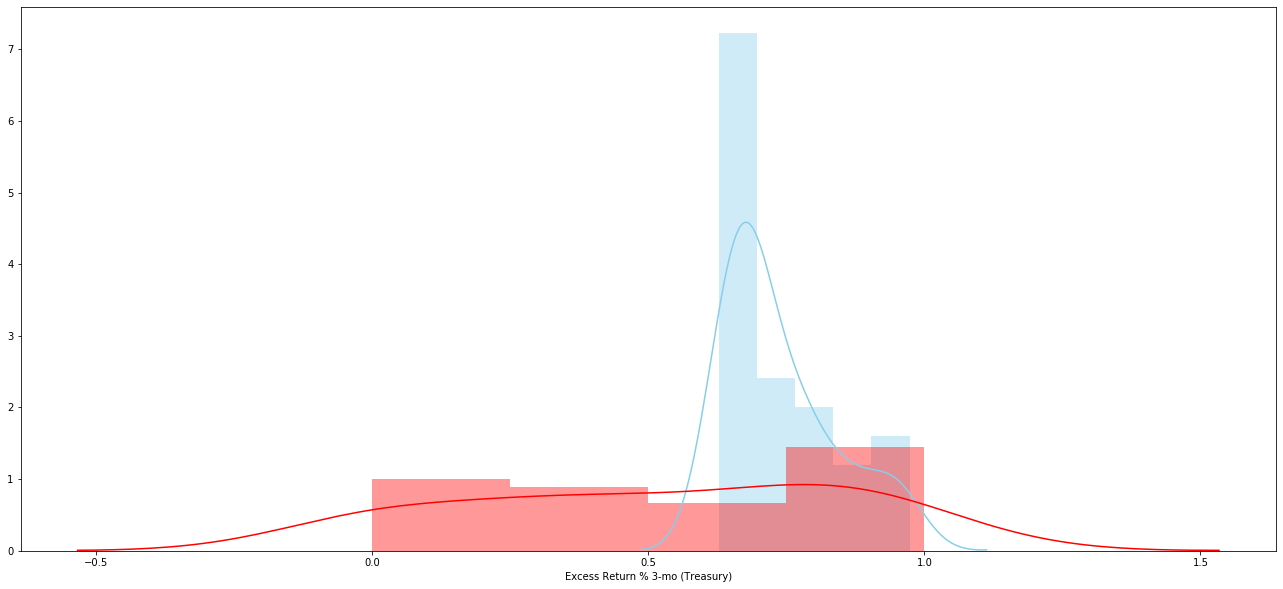

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 3-mo (Agg)  36.0  0.502483  0.327027  0.054504   0.391833   
 2                    combined  72.0  0.619544  0.267570  0.031533   0.556668   
 
    Interval  
 0  0.770604  
 1  0.613133  
 2  0.682420  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2341
 1                             Degrees of freedom =   70.0000
 2                                              t =    4.1060
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.9678
 7                                      Hedge's g =    0.9574
 8                                  Glass's delta =    

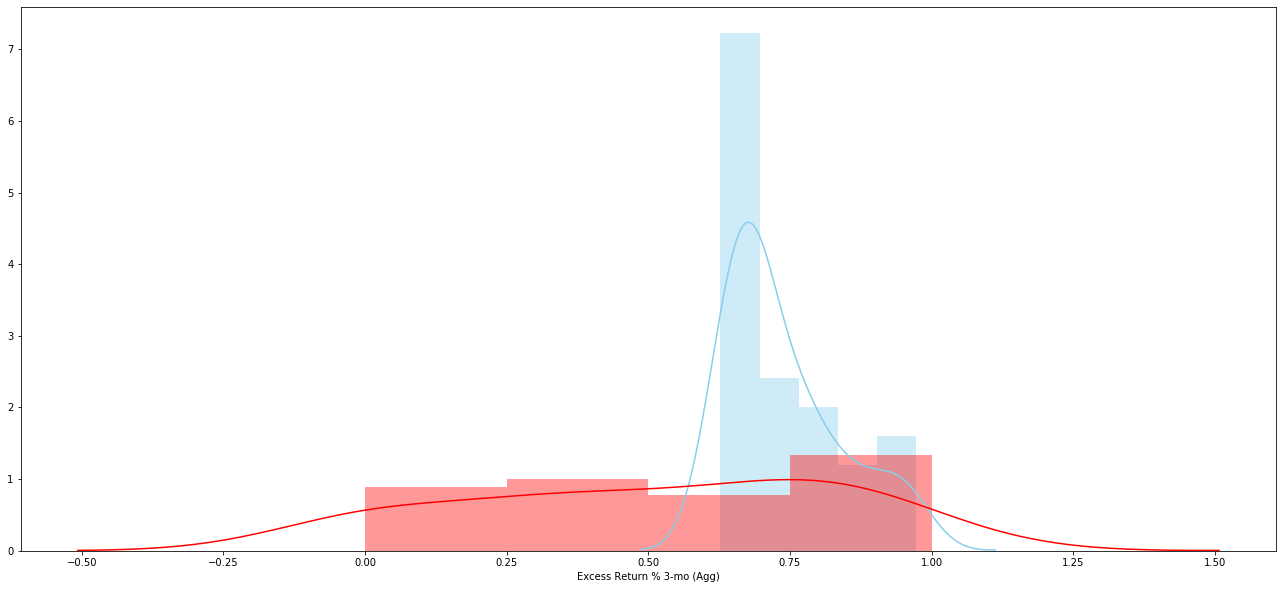

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 6-mo (Treasury)  36.0  0.521582  0.318240  0.053040   
 2                         combined  72.0  0.629094  0.258116  0.030419   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.413905  0.629259  
 2   0.568439  0.689748  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2150
 1                              Degrees of freedom =   70.0000
 2                                               t =    3.8659
 3                           Two side test p value =    0.0002
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.9112
 7                                       Hedge's g =    0.9014
 8                        

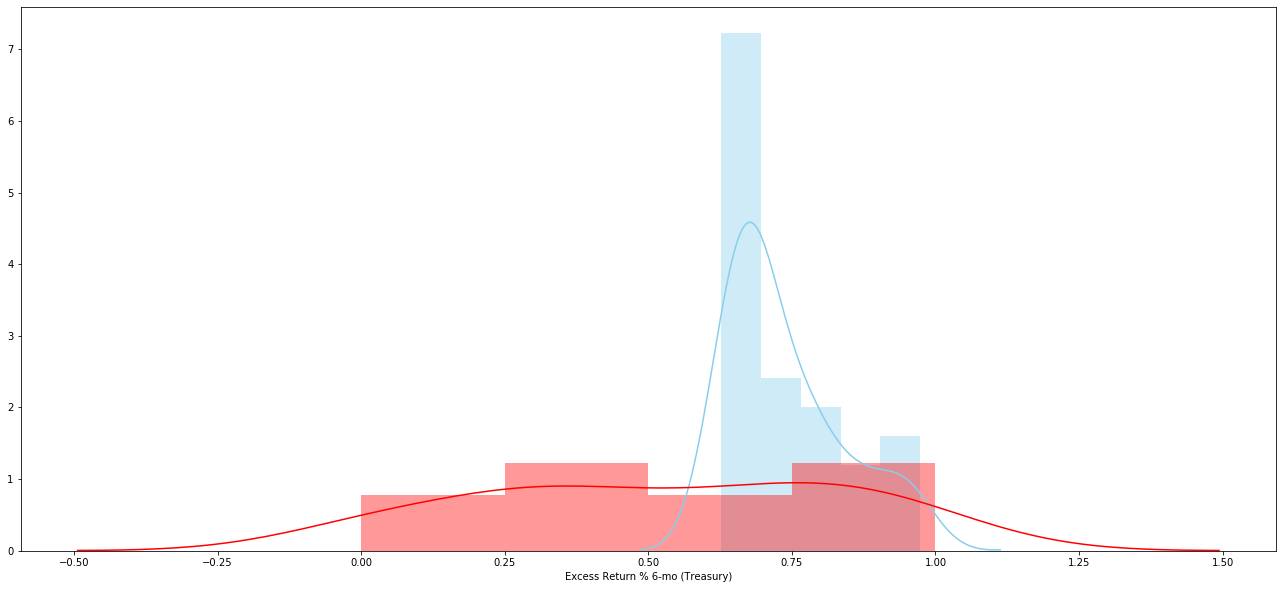

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 6-mo (Agg)  36.0  0.526253  0.325133  0.054189   0.416244   
 2                    combined  72.0  0.631429  0.261355  0.030801   0.570014   
 
    Interval  
 0  0.770604  
 1  0.636262  
 2  0.692845  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.2104
 1                             Degrees of freedom =   70.0000
 2                                              t =    3.7088
 3                          Two side test p value =    0.0004
 4                         Difference < 0 p value =    0.9998
 5                         Difference > 0 p value =    0.0002
 6                                      Cohen's d =    0.8742
 7                                      Hedge's g =    0.8648
 8                                  Glass's delta =    

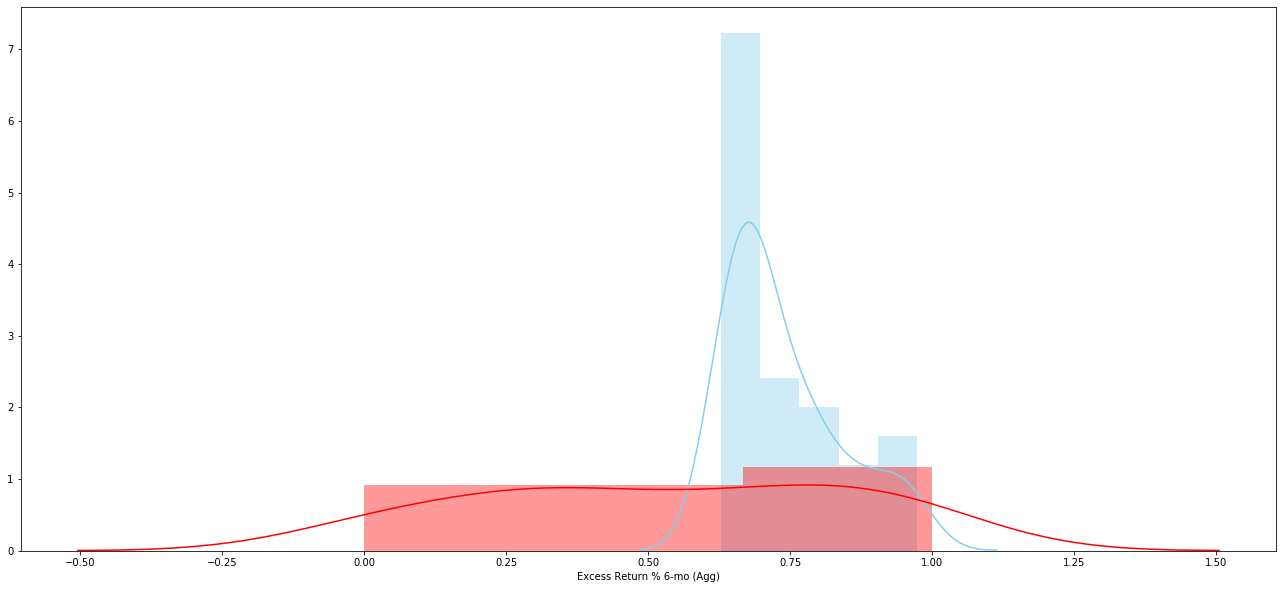

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 9-mo (Treasury)  36.0  0.500669  0.344400  0.057400   
 2                         combined  72.0  0.618637  0.278496  0.032821   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.384141  0.617197  
 2   0.553194  0.684081  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2359
 1                              Degrees of freedom =   70.0000
 2                                               t =    3.9459
 3                           Two side test p value =    0.0002
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.9301
 7                                       Hedge's g =    0.9201
 8                        

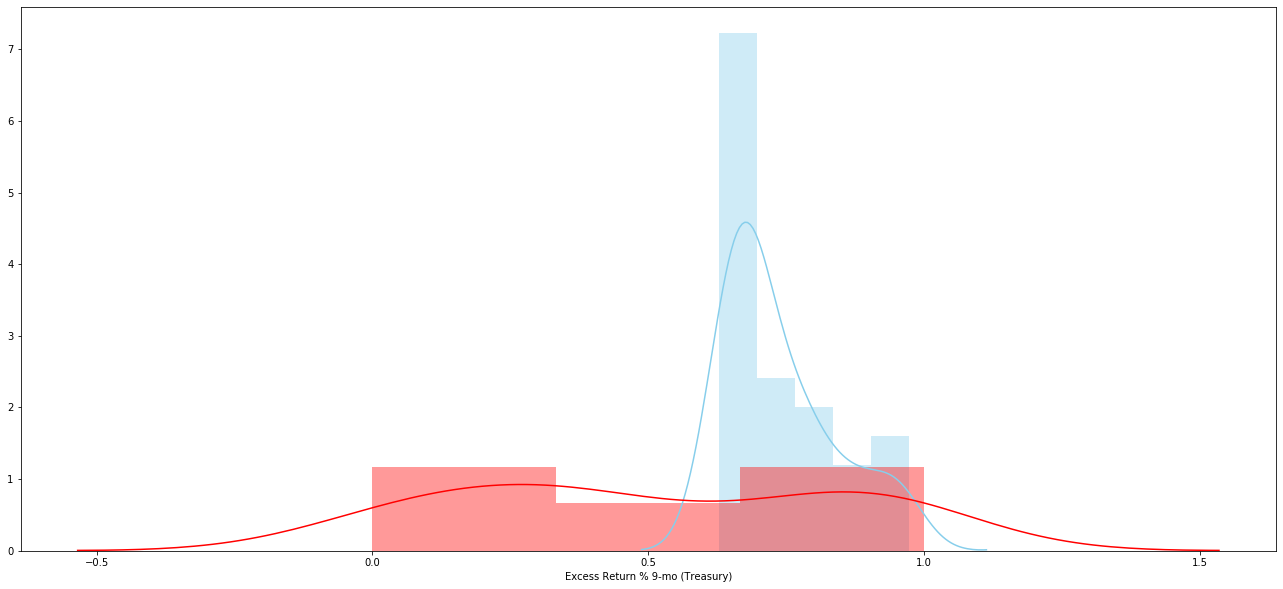

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 9-mo (Agg)  36.0  0.502038  0.335793  0.055965   0.388422   
 2                    combined  72.0  0.619322  0.272967  0.032169   0.555178   
 
    Interval  
 0  0.770604  
 1  0.615654  
 2  0.683466  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.2346
 1                             Degrees of freedom =   70.0000
 2                                              t =    4.0154
 3                          Two side test p value =    0.0001
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    0.9464
 7                                      Hedge's g =    0.9363
 8                                  Glass's delta =    

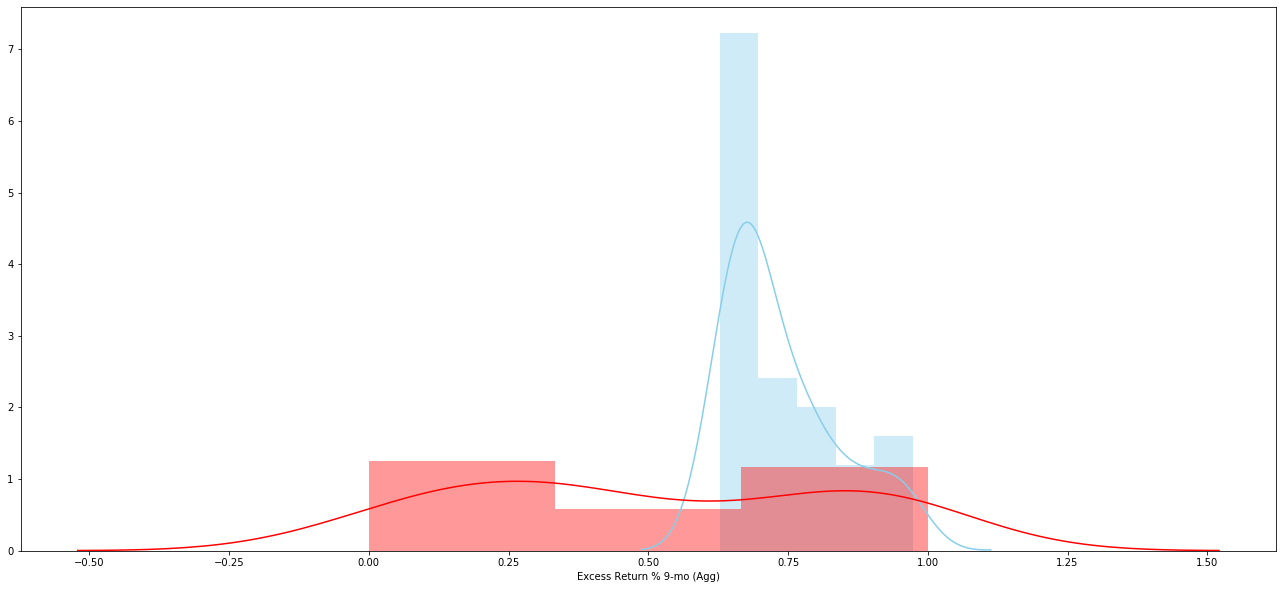

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 12-mo (Treasury)  36.0  0.502134  0.309195  0.051533   
 2                          combined  72.0  0.619370  0.256988  0.030286   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.397517  0.606751  
 2   0.558981  0.679759  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2345
 1                              Degrees of freedom =   70.0000
 2                                               t =    4.3272
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.0199
 7                                       Hedge's g =    1.0090
 8                    

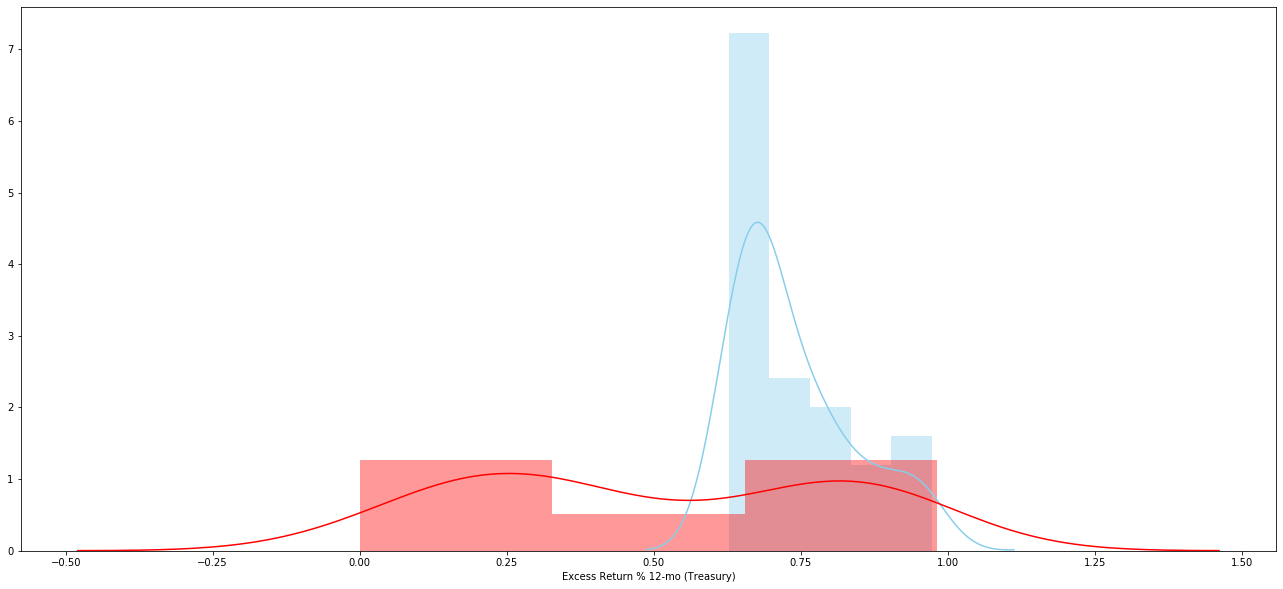

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 12-mo (Agg)  36.0  0.508854  0.300023  0.050004   0.407340   
 2                     combined  72.0  0.622730  0.250002  0.029463   0.563982   
 
    Interval  
 0  0.770604  
 1  0.610367  
 2  0.681477  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2278
 1                              Degrees of freedom =   70.0000
 2                                               t =    4.3189
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.0180
 7                                       Hedge's g =    1.0070
 8                                   Glass

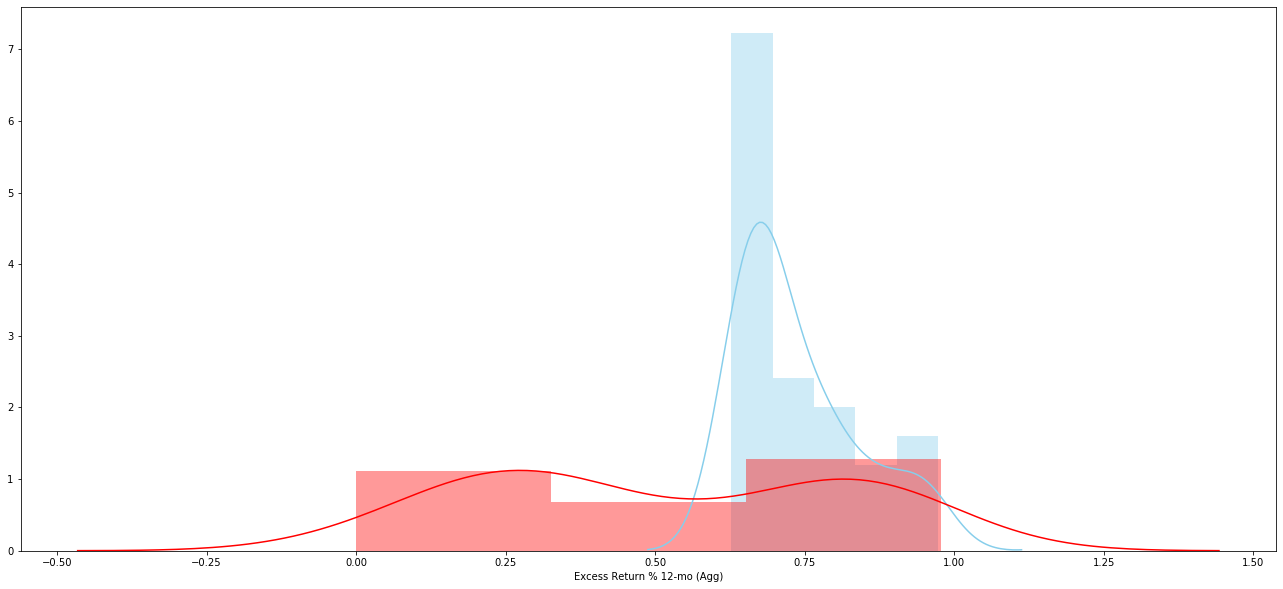

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 24-mo (Treasury)  36.0  0.594967  0.271799  0.045300   
 2                          combined  72.0  0.665787  0.215593  0.025408   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.503004  0.686931  
 2   0.615125  0.716449  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.1416
 1                              Degrees of freedom =   70.0000
 2                                               t =    2.9327
 3                           Two side test p value =    0.0045
 4                          Difference < 0 p value =    0.9977
 5                          Difference > 0 p value =    0.0023
 6                                       Cohen's d =    0.6912
 7                                       Hedge's g =    0.6838
 8                    

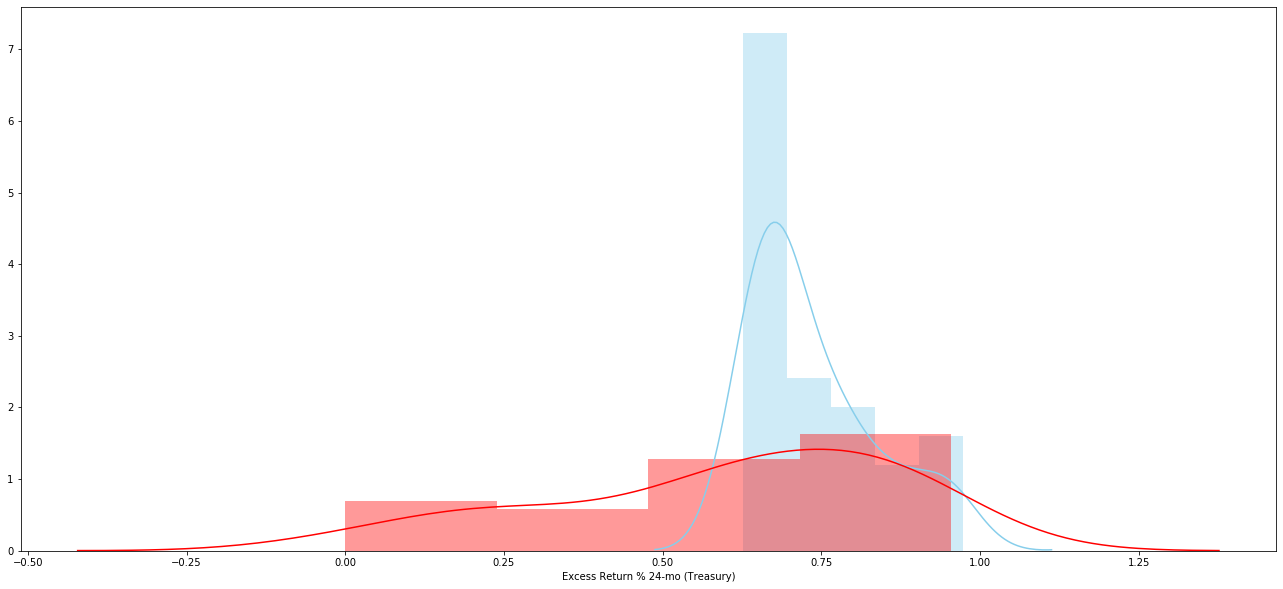

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 24-mo (Agg)  36.0  0.595538  0.269026  0.044838   0.504512   
 2                     combined  72.0  0.666072  0.213776  0.025194   0.615837   
 
    Interval  
 0  0.770604  
 1  0.686563  
 2  0.716307  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.1411
 1                              Degrees of freedom =   70.0000
 2                                               t =    2.9473
 3                           Two side test p value =    0.0044
 4                          Difference < 0 p value =    0.9978
 5                          Difference > 0 p value =    0.0022
 6                                       Cohen's d =    0.6947
 7                                       Hedge's g =    0.6872
 8                                   Glass

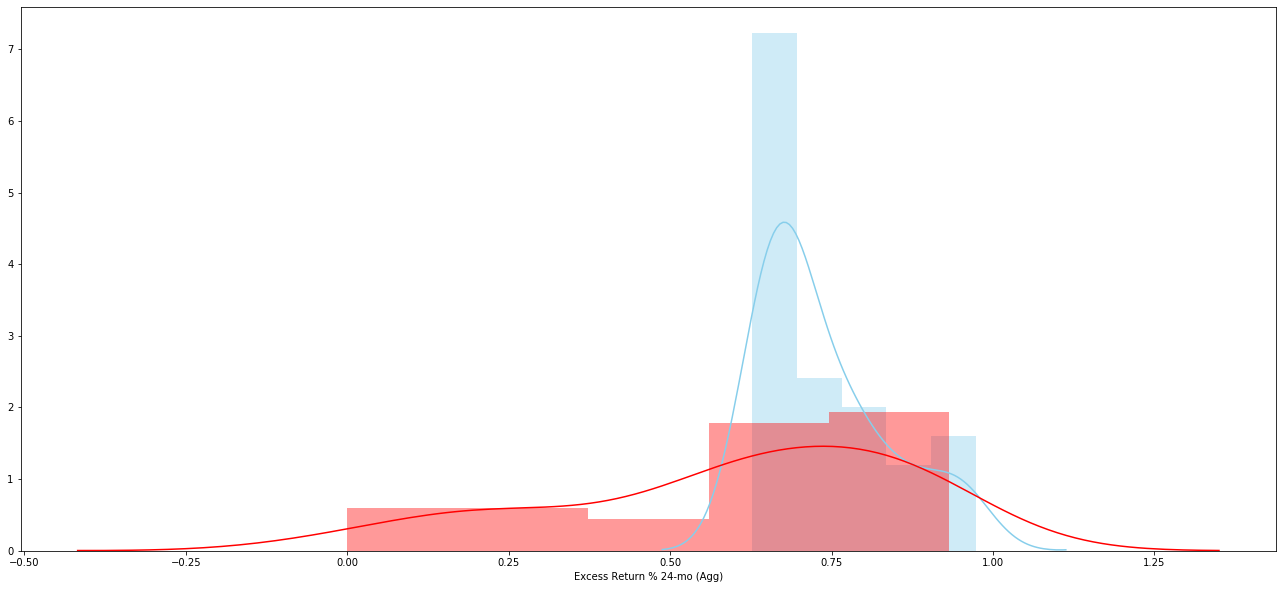

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 36-mo (Treasury)  36.0  0.629589  0.142252  0.023709   
 2                          combined  72.0  0.683098  0.133627  0.015748   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.581458  0.677720  
 2   0.651697  0.714498  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1070
 1                              Degrees of freedom =   70.0000
 2                                               t =    3.6868
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.8690
 7                                       Hedge's g =    0.8596
 8                    

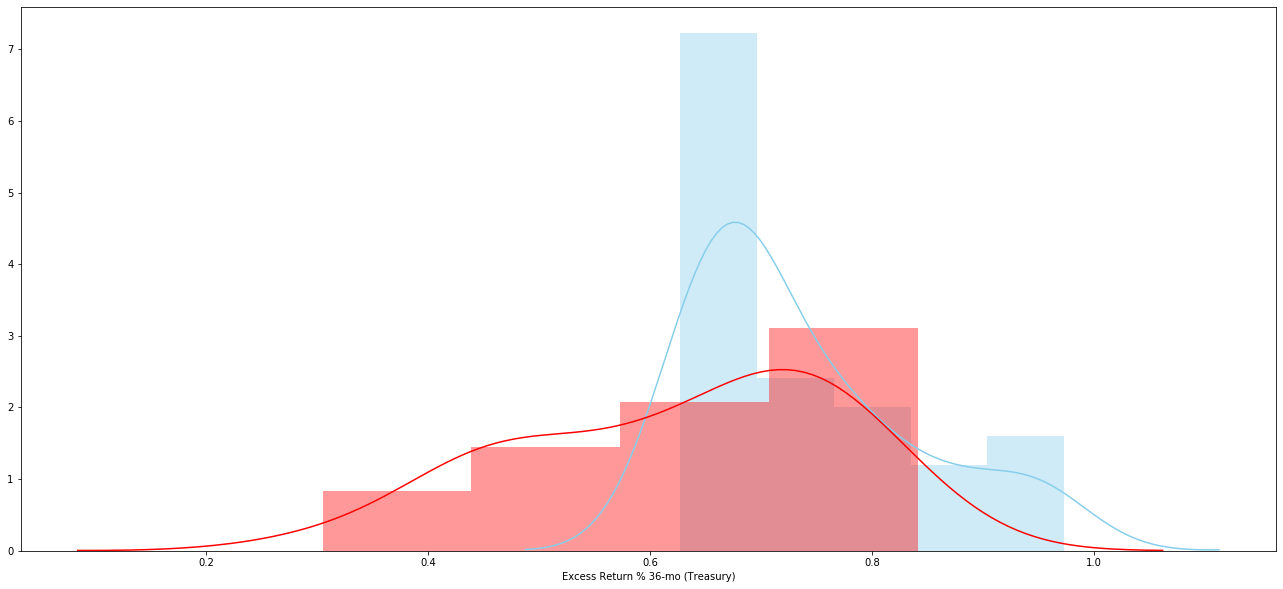

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 36-mo (Agg)  36.0  0.633944  0.141966  0.023661   0.585909   
 2                     combined  72.0  0.685275  0.132607  0.015628   0.654114   
 
    Interval  
 0  0.770604  
 1  0.681978  
 2  0.716436  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.1027
 1                              Degrees of freedom =   70.0000
 2                                               t =    3.5415
 3                           Two side test p value =    0.0007
 4                          Difference < 0 p value =    0.9996
 5                          Difference > 0 p value =    0.0004
 6                                       Cohen's d =    0.8347
 7                                       Hedge's g =    0.8258
 8                                   Glass

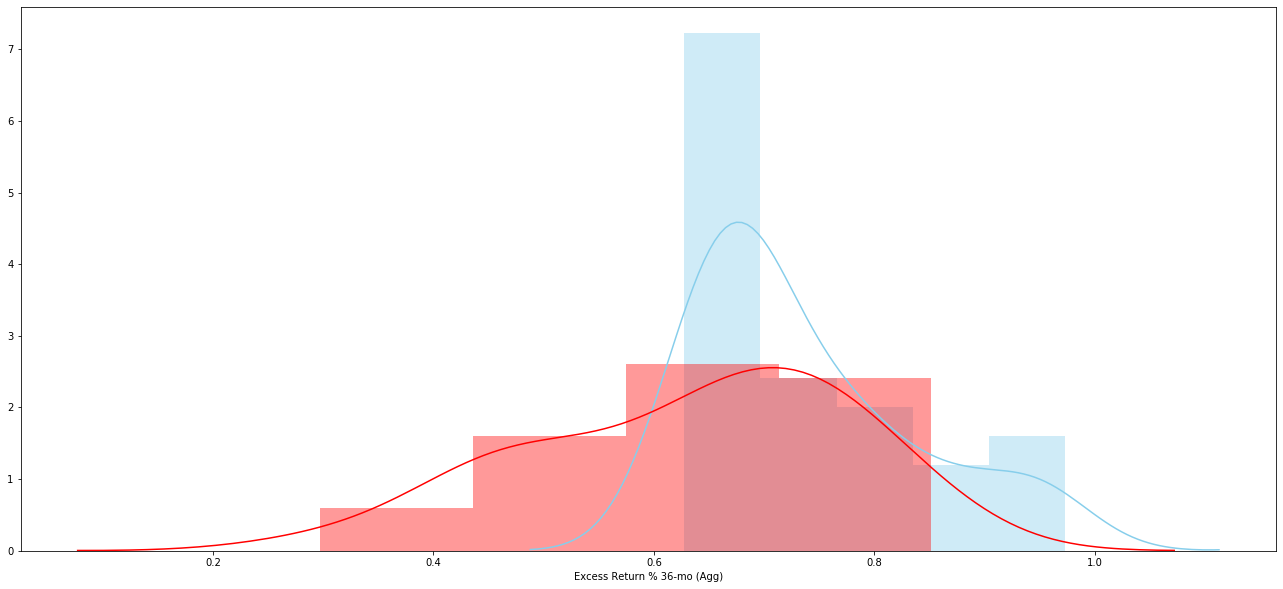

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_HY.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg)
count,279.000000,279.000000,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000
mean,0.351159,0.492857,0.494827,0.490379,0.489711,0.495175,0.499683,0.507613,0.505828,0.497147,0.499497,0.507319,0.498248,0.493073,0.484863
std,0.247503,0.237344,0.233785,0.235178,0.219736,0.223090,0.225057,0.219753,0.213179,0.207683,0.201386,0.215835,0.219765,0.208462,0.217124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155043,0.371940,0.372569,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.289734,0.500462,0.504350,0.512762,0.514750,0.512260,0.523454,0.533540,0.522281,0.512685,0.503557,0.541286,0.537844,0.517038,0.523230
75%,0.489075,0.624134,0.622223,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 3-mo (Treasury)  278.0  0.490379  0.235178  0.014105   
 2                         combined  314.0  0.518609  0.237171  0.013384   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.462612  0.518146  
 2   0.492274  0.544944  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2462
 1                              Degrees of freedom =   312.0000
 2                                               t =     6.2020
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0986
 7                                       Hedge's g =     1.0959
 8           

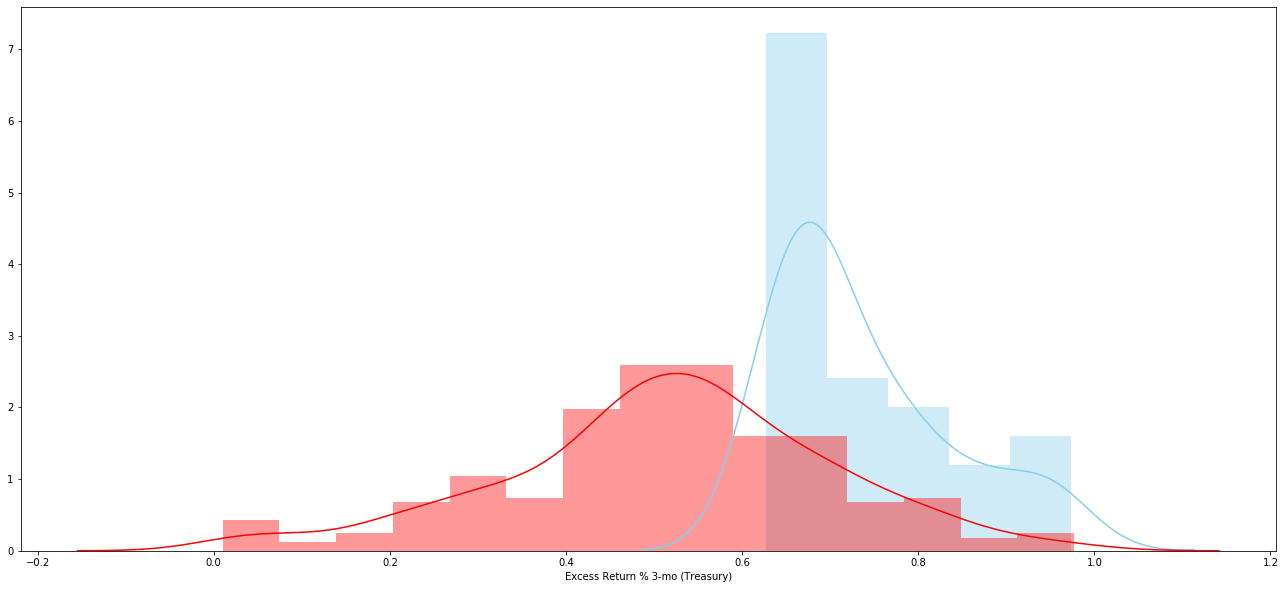

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 3-mo (Agg)  278.0  0.489711  0.219736  0.013179   0.463767   
 2                    combined  314.0  0.518017  0.223756  0.012627   0.493172   
 
    Interval  
 0  0.770604  
 1  0.515654  
 2  0.542862  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2469
 1                             Degrees of freedom =   312.0000
 2                                              t =     6.6450
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1770
 7                                      Hedge's g =     1.1742
 8                                  Glass'

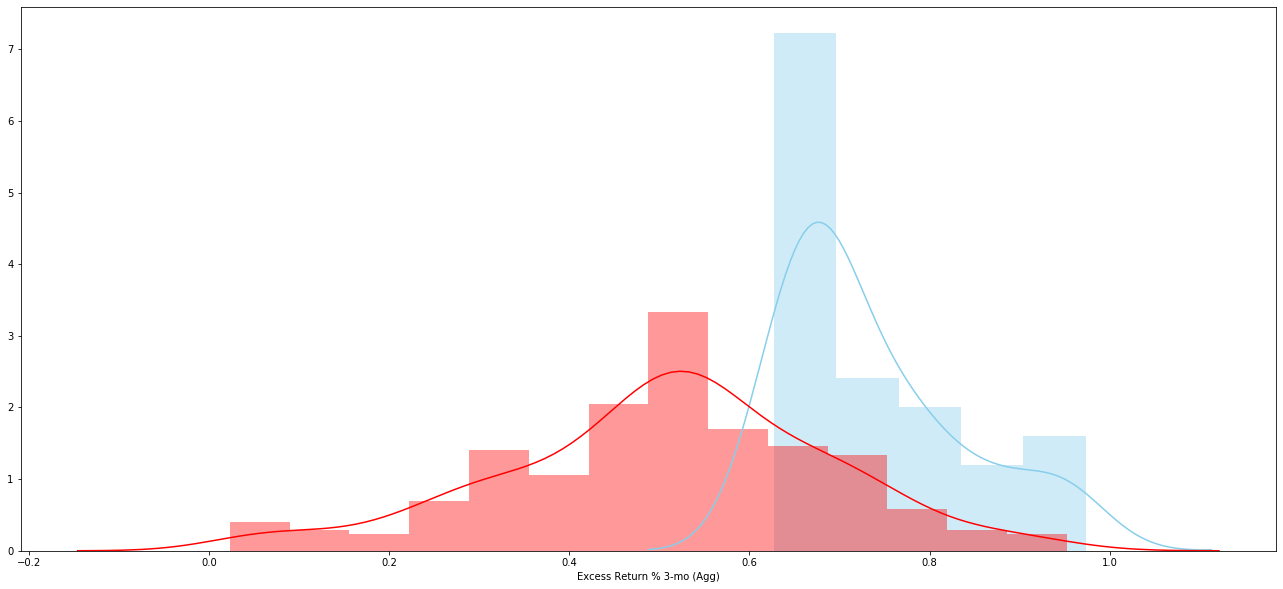

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 6-mo (Treasury)  275.0  0.495175  0.223090  0.013453   
 2                         combined  311.0  0.523122  0.226086  0.012820   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.468691  0.521659  
 2   0.497897  0.548348  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2414
 1                              Degrees of freedom =   309.0000
 2                                               t =     6.4017
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1346
 7                                       Hedge's g =     1.1319
 8           

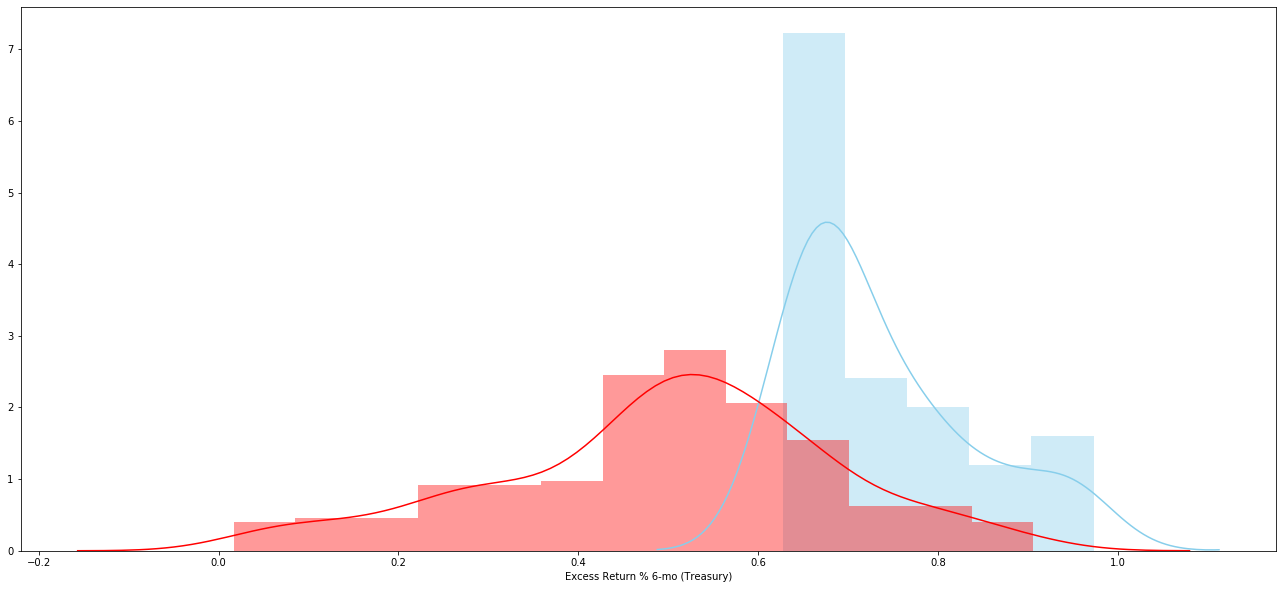

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 6-mo (Agg)  275.0  0.499683  0.225057  0.013571   0.472965   
 2                    combined  311.0  0.527108  0.227317  0.012890   0.501745   
 
    Interval  
 0  0.770604  
 1  0.526400  
 2  0.552471  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2369
 1                             Degrees of freedom =   309.0000
 2                                              t =     6.2287
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1040
 7                                      Hedge's g =     1.1013
 8                                  Glass'

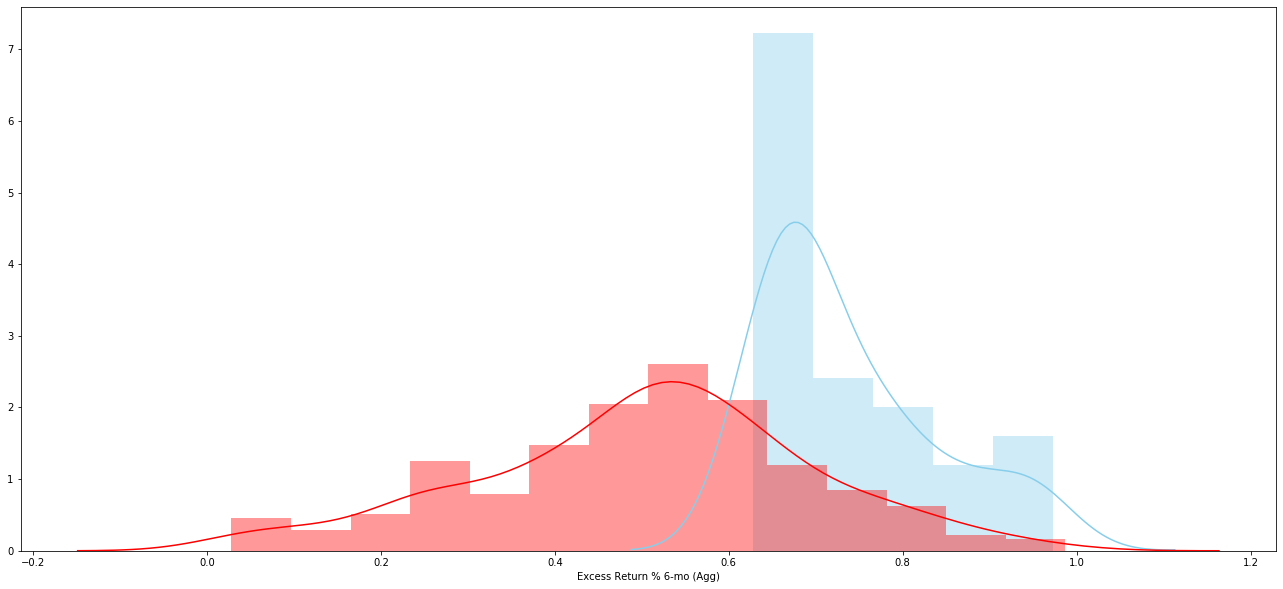

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 9-mo (Treasury)  272.0  0.507613  0.219753  0.013325   
 2                         combined  308.0  0.534378  0.221834  0.012640   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.481380  0.533846  
 2   0.509506  0.559251  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2290
 1                              Degrees of freedom =   306.0000
 2                                               t =     6.1608
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0926
 7                                       Hedge's g =     1.0900
 8           

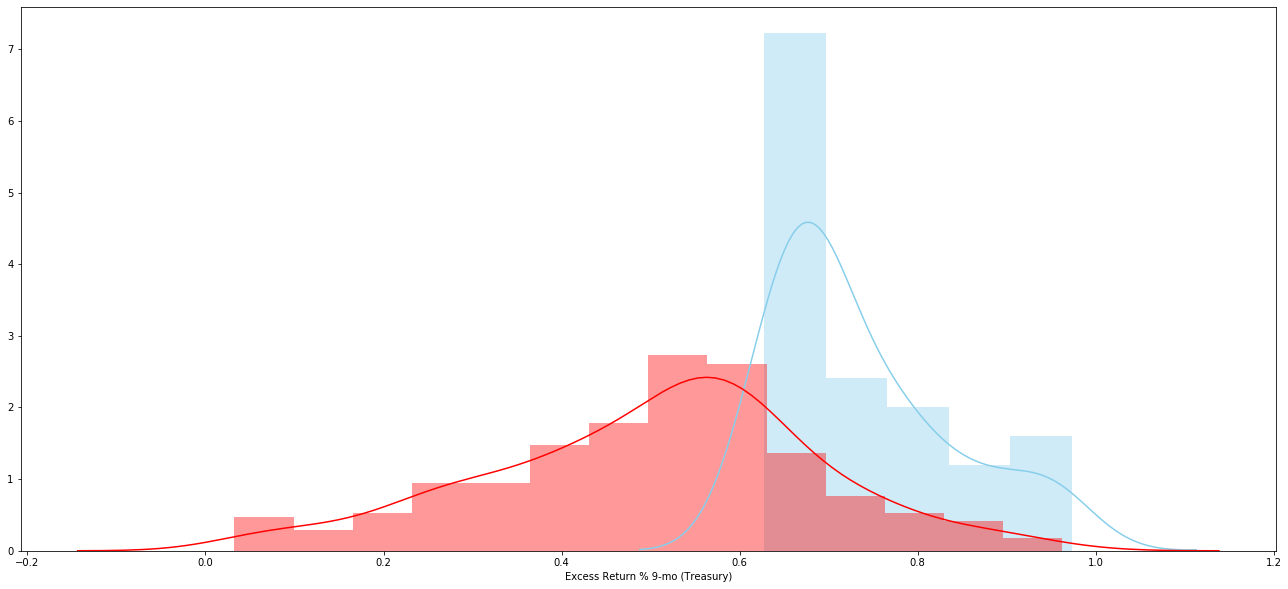

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   36.0  0.736606  0.100483  0.016747   0.702607   
 1  Excess Return % 9-mo (Agg)  272.0  0.505828  0.213179  0.012926   0.480380   
 2                    combined  308.0  0.532802  0.216293  0.012324   0.508551   
 
    Interval  
 0  0.770604  
 1  0.531276  
 2  0.557053  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2308
 1                             Degrees of freedom =   306.0000
 2                                              t =     6.3950
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1342
 7                                      Hedge's g =     1.1314
 8                                  Glass'

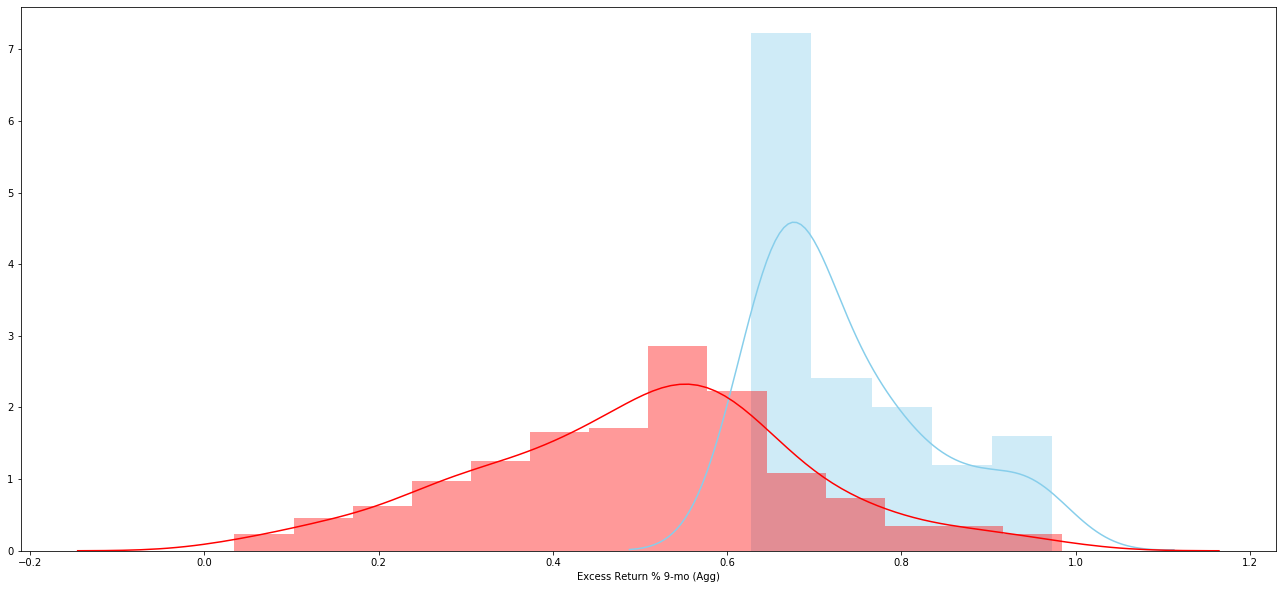

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 12-mo (Treasury)  269.0  0.497147  0.207683  0.012663   
 2                          combined  305.0  0.525411  0.212546  0.012170   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.472216  0.522078  
 2   0.501462  0.549360  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2395
 1                              Degrees of freedom =   303.0000
 2                                               t =     6.8049
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2077
 7                                       Hedge's g =     1.2047
 8       

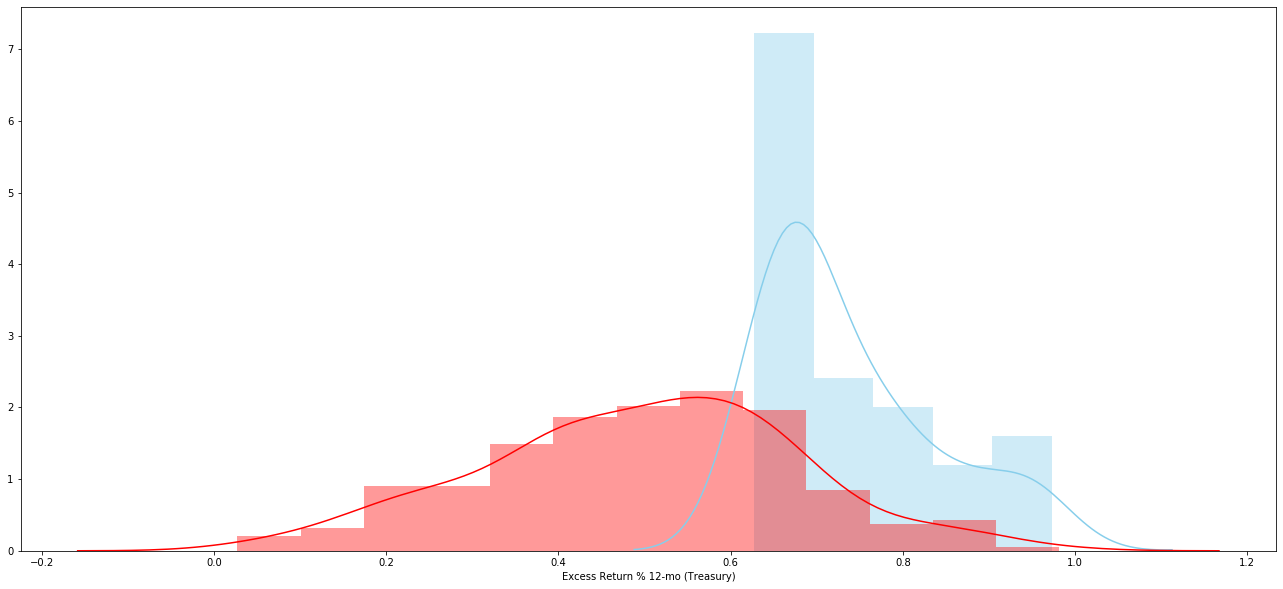

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 12-mo (Agg)  269.0  0.499497  0.201386  0.012279   
 2                     combined  305.0  0.527483  0.206852  0.011844   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.475322  0.523672  
 2   0.504176  0.550790  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2371
 1                              Degrees of freedom =   303.0000
 2                                               t =     6.9423
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2320
 7                                       Hedge's g =     1.2290
 8                           

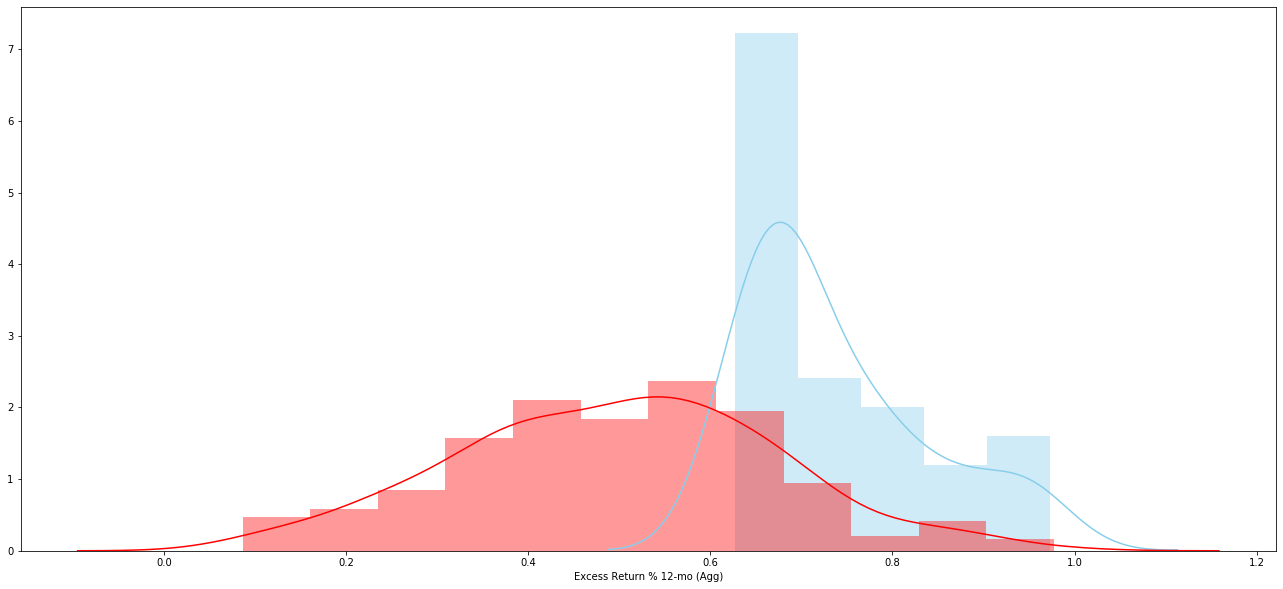

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 24-mo (Treasury)  257.0  0.507319  0.215835  0.013463   
 2                          combined  293.0  0.535491  0.218488  0.012764   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.480806  0.533832  
 2   0.510369  0.560612  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2293
 1                              Degrees of freedom =   291.0000
 2                                               t =     6.2723
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1162
 7                                       Hedge's g =     1.1133
 8       

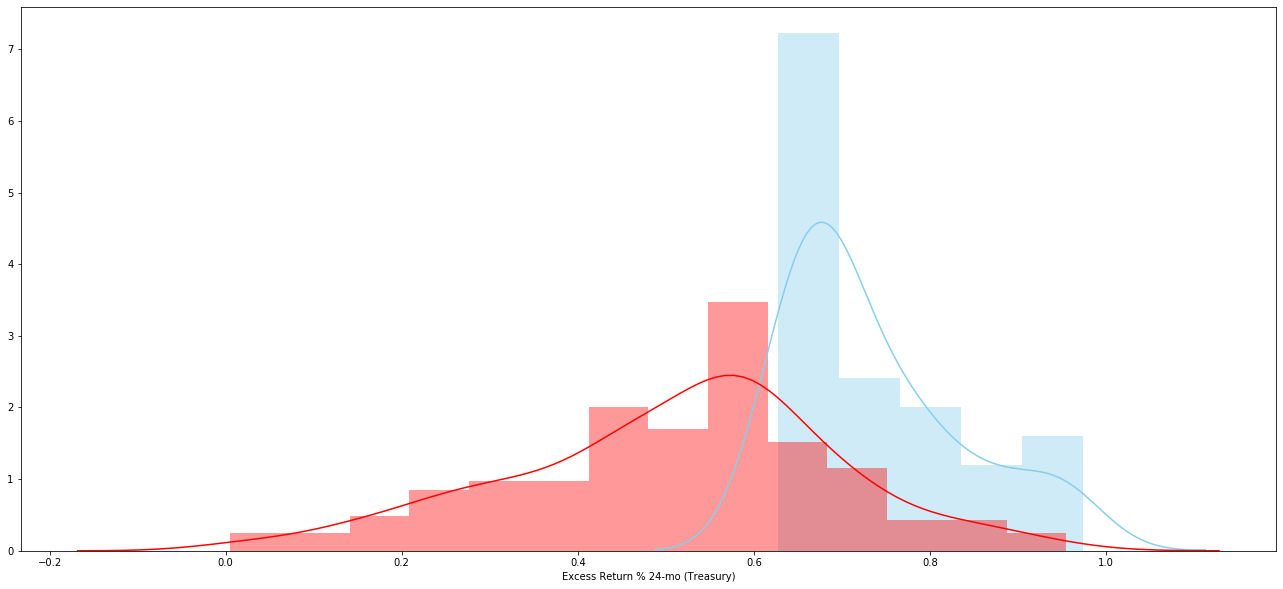

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 24-mo (Agg)  257.0  0.498248  0.219765  0.013709   
 2                     combined  293.0  0.527534  0.222927  0.013024   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.471252  0.525244  
 2   0.501903  0.553166  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2384
 1                              Degrees of freedom =   291.0000
 2                                               t =     6.4071
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1402
 7                                       Hedge's g =     1.1372
 8                           

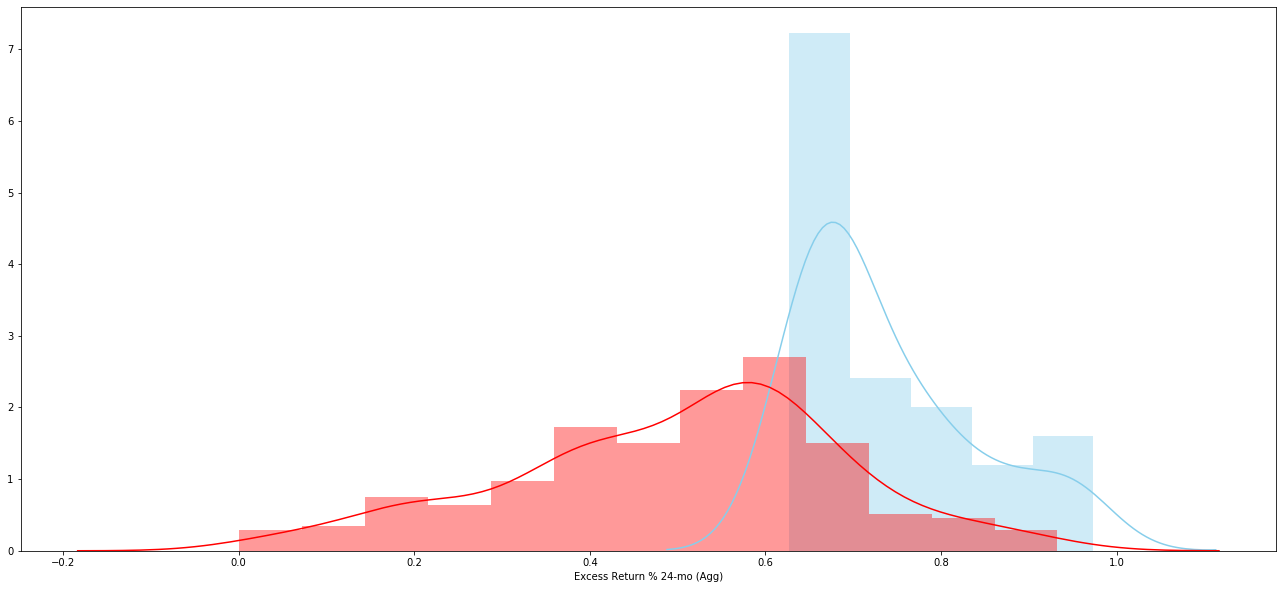

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 36-mo (Treasury)  245.0  0.493073  0.208462  0.013318   
 2                          combined  281.0  0.524273  0.213962  0.012764   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.466840  0.519306  
 2   0.499147  0.549398  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2435
 1                              Degrees of freedom =   279.0000
 2                                               t =     6.8849
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2289
 7                                       Hedge's g =     1.2256
 8       

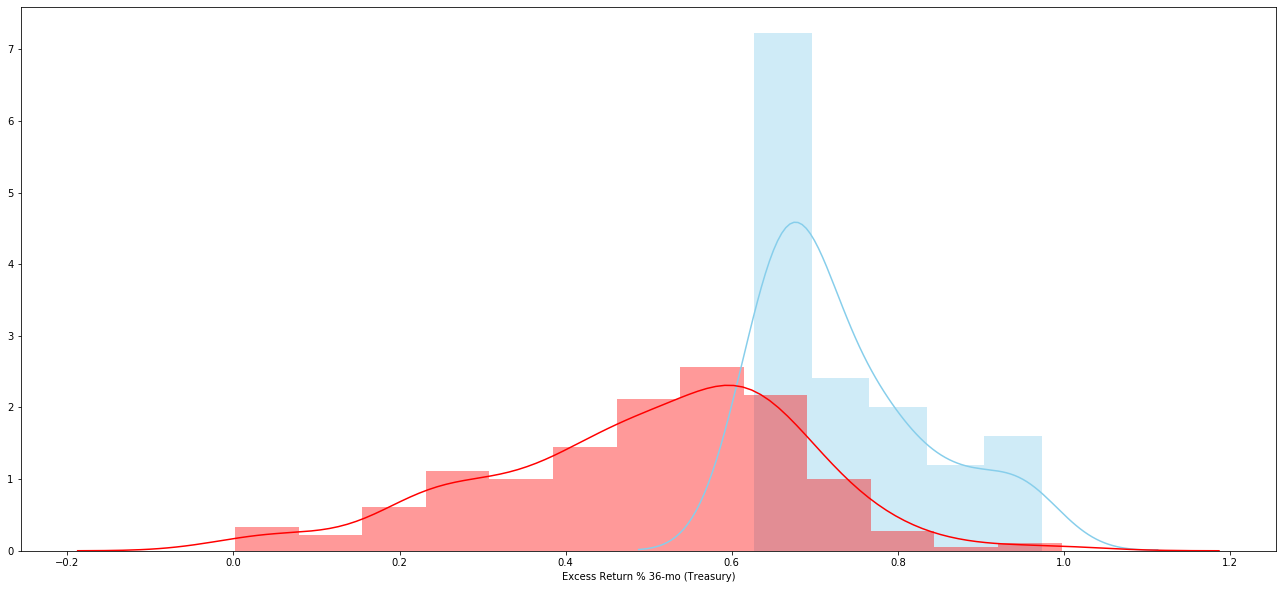

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   36.0  0.736606  0.100483  0.016747   
 1  Excess Return % 36-mo (Agg)  245.0  0.484863  0.217124  0.013872   
 2                     combined  281.0  0.517115  0.222369  0.013265   
 
    95% Conf.  Interval  
 0   0.702607  0.770604  
 1   0.457540  0.512186  
 2   0.491002  0.543227  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2517
 1                              Degrees of freedom =   279.0000
 2                                               t =     6.8418
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2212
 7                                       Hedge's g =     1.2179
 8                           

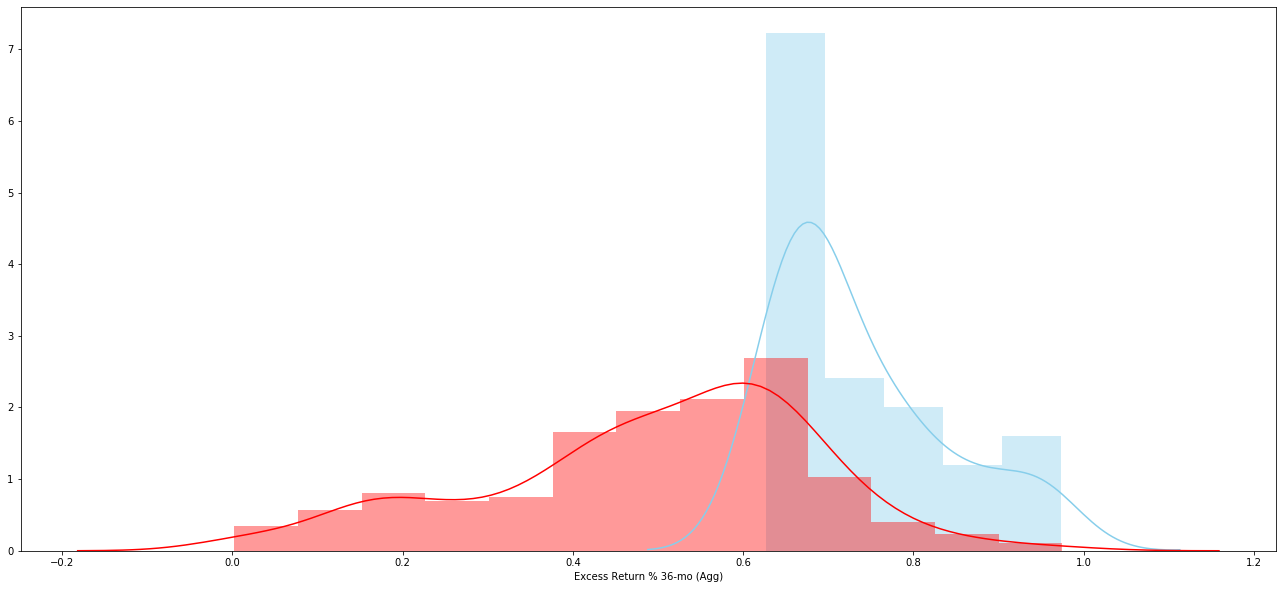

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")